In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


# Exploratory Data Analysis

### Importing Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Training Data

In [3]:
data=pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv',index_col=0)
data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin           1

As we can see there are 22 columns in our dataset with 'smoking' being our target column

### Checking Null values and Duplicated Values

In [6]:
data.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [7]:
data.duplicated().sum()

0

**There are no null values or duplicated values in our dataset. Therefore there is no need for any imputation step**

# Data Visualization

<Axes: xlabel='age', ylabel='Count'>

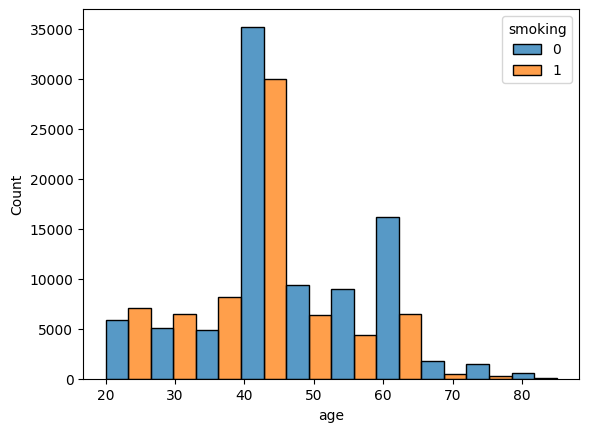

In [8]:
sns.histplot(data=data,x='age',bins=10,hue='smoking',multiple="dodge")

We can infer the following points from the above graph:-
1) In the given dataset, the proportion of people who smoke is likely to be greater than the people who don't smoke

2) Most of the people in the given dataset are around 40 years old

3) After 50 years, people who don't smoke are higher in number as compared to people who smoke

<Axes: xlabel='weight(kg)', ylabel='waist(cm)'>

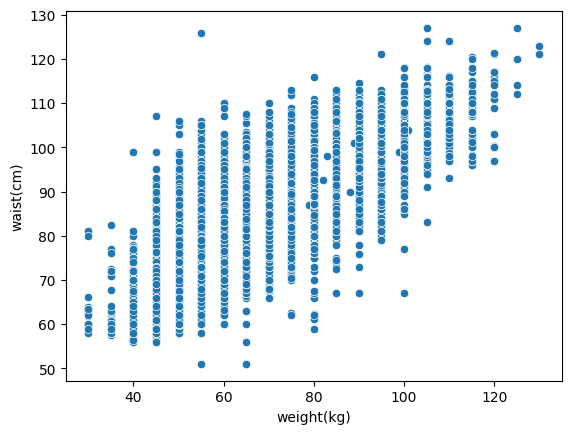

In [9]:
sns.scatterplot(data=data,x='weight(kg)',y='waist(cm)')

Text(0.5, 1.0, 'Heatmap or Correlation Matrix Plot of Dataset')

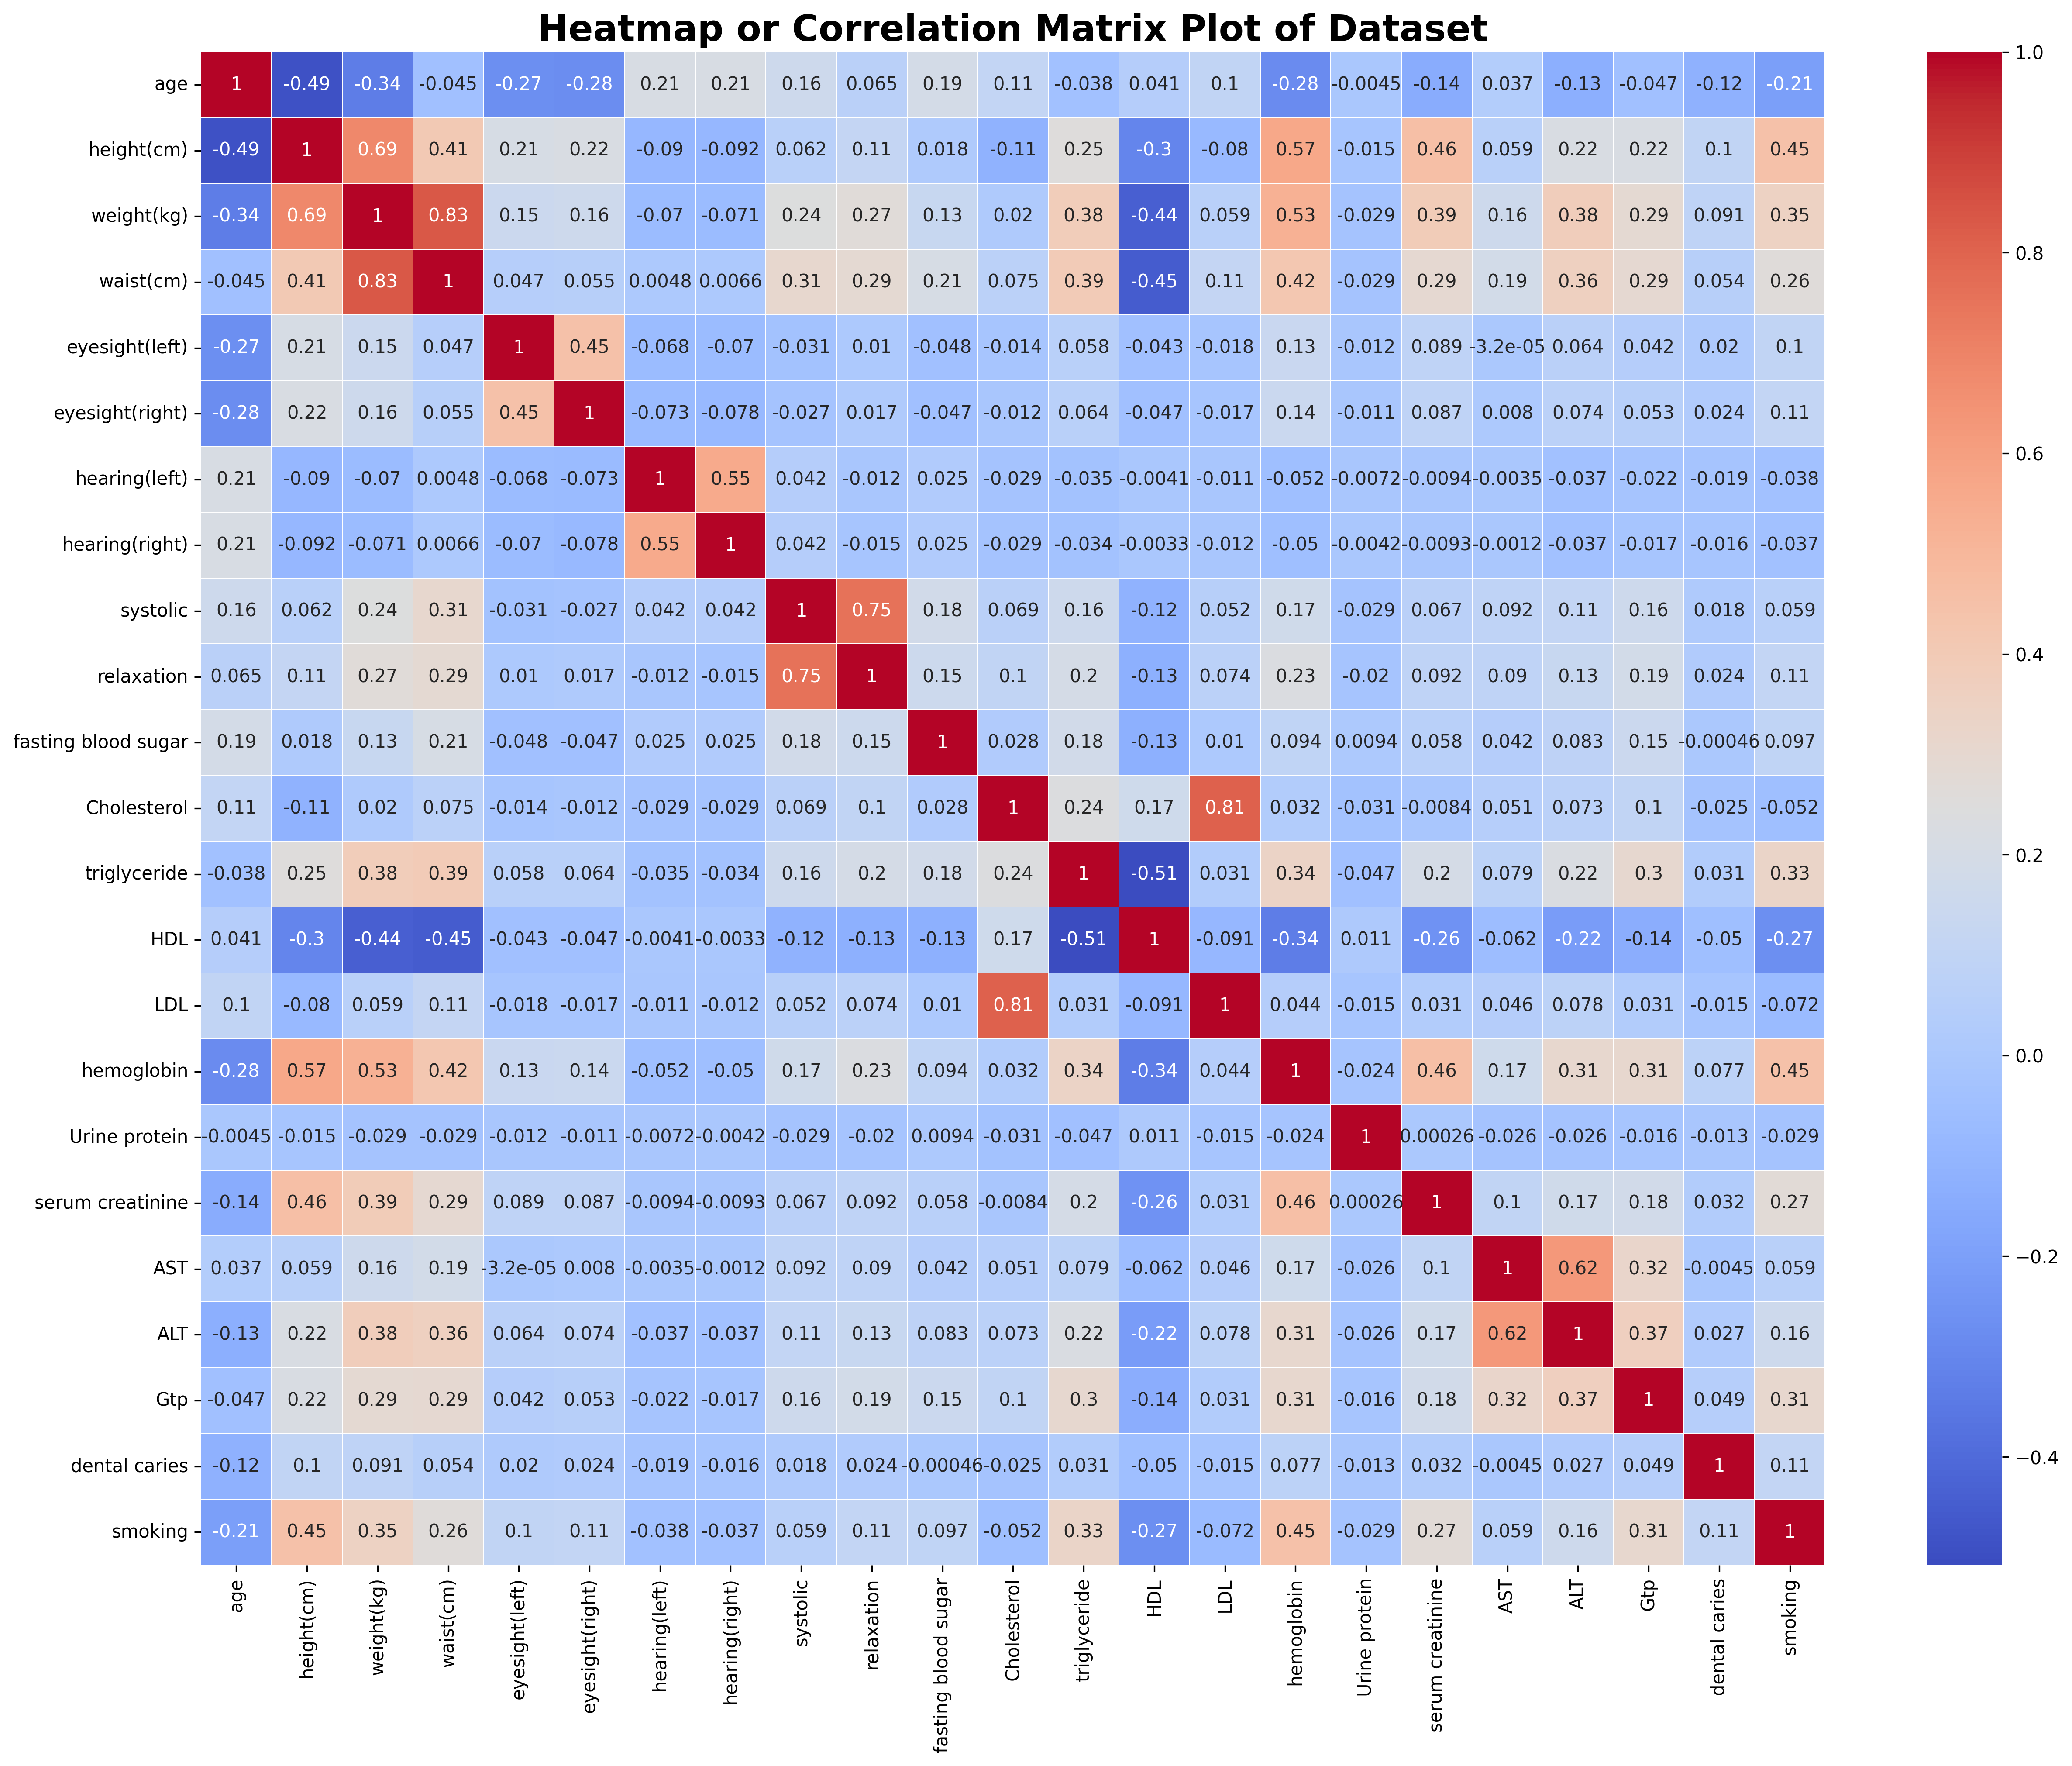

In [10]:
plt.figure(figsize = (20, 15), dpi = 300)
corr=data.corr()
sns.heatmap(corr,cmap='coolwarm',linewidths = .1,annot=True)
plt.title('Heatmap or Correlation Matrix Plot of Dataset', fontsize = 20, fontweight = 'bold')

# Model Training

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve,roc_auc_score

### Train-test-split

In [12]:
X=data.drop('smoking',axis=1)
y=data['smoking']

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will create a function train_and_evaluate_models() that return the model name and F1-score value for each model

### Scaling of Input Data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
#X_train= scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [16]:
def train_and_evaluate_models(X, y, models):
    results = []
    
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling of data
    X_train= scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    for model in models:
        model_name = model.__class__.__name__
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate F1-score
        #score = f1_score(y_test, y_pred,average='micro')
        y_prob = model.predict_proba(X_test)[:, 1]
        score = roc_auc_score(y_test, y_prob)
        
        results.append((model_name, score))
    
    return results

In [17]:
models = [
    #LogisticRegression(),
    #DecisionTreeClassifier(),
    #RandomForestClassifier(),
    #SVC(),
    #GradientBoostingClassifier(),
    #XGBClassifier(),
    #GaussianNB(),
    #MultinomialNB(),
    #KNeighborsClassifier(),
    LGBMClassifier()
]

In [18]:
# Calling the function with the data and models
results = train_and_evaluate_models(X, y, models)

# Printing the results
for model_name, score in results:
    print(f"{model_name}: Area under ROC curve: = {score:.2f}")

LGBMClassifier: Area under ROC curve: = 0.86


Following were the Area under the ROC curve for the models that were executed. All of the models were trained on the dataset without any hyperparameter tunung:

1) LogisticRegression : 0.83

2) DecisionTreeClasifier: 0.69

3) RandomForestClassifier: 0.85

4) XGBClassifier: 0.86

5) GradientBoostingClassifier : 0.86

6) GaussianNB: 0.79

7) MultinomialNB: 0.72 

8) KNeighborsClassifier: 0.79

9) LGBMClassifier: 0.86

As we can see from the ROC AUC scores, the XGB,LGBM and Gradient Boosting Classifier models gave the best value without any hyperparameter tuning.

So we will now train the model on the full Training Dataset

## Hyperparameter Tuning

In [19]:
from sklearn.model_selection import RandomizedSearchCV

### LGBM Hyperparameter Tuning

In [20]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Define the LightGBM classifier
lgbm = LGBMClassifier()

# Define the hyperparameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1]
}

# Create a GridSearchCV object
random_search = RandomizedSearchCV(estimator=lgbm,param_distributions=param_dist,n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)

# Perform hyperparameter tuning on the training data
random_search.fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [5, 10, 15],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='roc_auc')

In [22]:
# Get the best hyperparameters from the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}


In [23]:
# Train the LightGBM classifier with the best hyperparameters
best_lgbm = LGBMClassifier(**best_params)
best_lgbm.fit(X,y)


LGBMClassifier(max_depth=5, n_estimators=300)

# Predictions on Test Data

## Exploring Test Data

In [24]:
test_data=pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv',index_col=0)
test_data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
id,,,,,,,,,,,,,,,,,,,,,
159256,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
159257,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
159258,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
159259,40,160,50,67.0,0.3,0.4,1,1,116,62,...,47,75,128,14.5,1,0.6,25,18,10,1
159260,40,170,75,89.4,1.0,0.9,1,1,132,94,...,100,39,123,16.5,1,1.0,30,39,27,1


In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106171 entries, 159256 to 265426
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  106171 non-null  int64  
 1   height(cm)           106171 non-null  int64  
 2   weight(kg)           106171 non-null  int64  
 3   waist(cm)            106171 non-null  float64
 4   eyesight(left)       106171 non-null  float64
 5   eyesight(right)      106171 non-null  float64
 6   hearing(left)        106171 non-null  int64  
 7   hearing(right)       106171 non-null  int64  
 8   systolic             106171 non-null  int64  
 9   relaxation           106171 non-null  int64  
 10  fasting blood sugar  106171 non-null  int64  
 11  Cholesterol          106171 non-null  int64  
 12  triglyceride         106171 non-null  int64  
 13  HDL                  106171 non-null  int64  
 14  LDL                  106171 non-null  int64  
 15  hemoglobin       

There are no null values in our dataset

## Predictions

In [26]:
scaled_test_data = scaler.transform(test_data)

In [27]:
lgbm_predictions = best_lgbm.predict(test_data)

In [28]:
output = pd.DataFrame({'id':test_data.index,
                      'smoking':lgbm_predictions })
output.to_csv('submission.csv',index=False)

In [29]:
output

,id,smoking
0,159256,1
1,159257,0
2,159258,0
3,159259,0
4,159260,1
...,...,...
106166,265422,1
106167,265423,1
106168,265424,0
106169,265425,0
